## Perceptron Assignment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification 

In [9]:
features, targets = make_classification(
    n_samples = 20,
    n_features = 2,
    n_informative = 1,
    n_redundant = 0,
    n_clusters_per_class =1 ,
    random_state = 1
)

Putting the data into a pandas DataFrame to see what it looks like

In [10]:
df = pd.DataFrame(data=features, columns=['x1', 'x2'])
df['targets'] = targets
df.head()

,x1,x2,targets
0,-0.887629,0.784959,1
1,-0.012665,1.141704,1
2,-0.191836,0.984424,1
3,-0.267888,-0.330421,0
4,-0.935769,-1.883225,0


In [11]:
df

,x1,x2,targets
0,-0.887629,0.784959,1
1,-0.012665,1.141704,1
2,-0.191836,0.984424,1
3,-0.267888,-0.330421,0
4,-0.935769,-1.883225,0
5,0.234416,1.405825,1
6,0.530355,-1.292116,0
7,-0.122890,-0.667896,0
8,-0.845206,1.760128,1
9,1.659802,1.063621,1


In [12]:
features.shape

(20, 2)

In [13]:
targets.shape

(20,)

to count how many many samples of each class (bincount())

In [14]:
np.bincount(targets)

array([10, 10])

To visualize dataset 

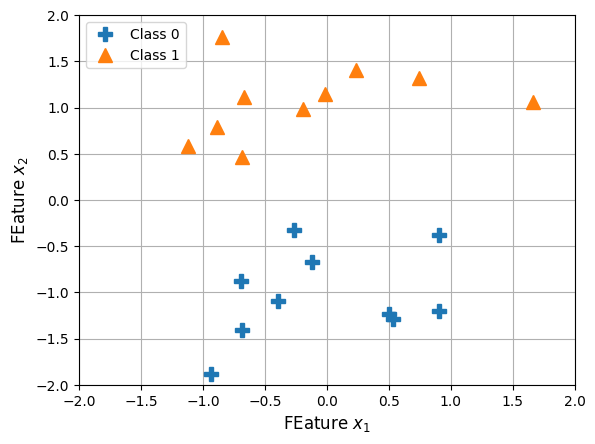

In [27]:
plt.plot(
    features[targets == 0,0],
    features[targets == 0,1],
    marker ='P',
    markersize = 10,
    linestyle ='',
    label ='Class 0'
)
plt.plot(
    features[targets == 1, 0],
    features[targets == 1,1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    label = 'Class 1'
)
plt.legend(loc=2)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel("FEature $x_1$", fontsize=12)
plt.ylabel("FEature $x_2$", fontsize=12)
plt.grid()
plt.show()

Implementing Perceptron

In [28]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

ppn = Perceptron(num_features=2)
ppn.weights


[0.0, 0.0]

In [29]:
ppn.bias

0

Implementing Forward Function

In [31]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights =[0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z =self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction
    
ppn = Perceptron(num_features=2)  #Re-initialize with 2 features
x =[1.23, 2.13]
ppn.forward(x)

0

Updating the Weights (The learning Rule)

In [52]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights =[0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z =self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction
    
    def update(self,x,y_true):
        prediction = self.forward(x)
        error = y_true - prediction

        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]
        
        return error
    
ppn = Perceptron(num_features=2)  #Re-initialize with 2 features
x =[1.1, 2.1]
ppn.update(x, y_true=1)

1

In [ ]:
# # class work - training model without Update function


# class Perceptron:
#     def __init__(self, num_features):
#         self.num_features = num_features
#         self.weights =[0.0 for _ in range(num_features)]
#         self.bias = 0

#     def forward(self, x):
#         weighted_sum_z =self.bias
#         for i, _ in enumerate(self.weights):
#             weighted_sum_z += x[i] * self.weights[i]

#         if weighted_sum_z > 0:
#             prediction = 1
#         else:
#             prediction = 0

#         return prediction
    
# ppn = Perceptron(num_features=2)  #Re-initialize with 2 features
# x =[1.1, 2.1]
# ppn.forward(x)

0

Form the above, the perceptron keeps giving us 0, meaning that there is no update function that is the model is unable to update it error and learn from it. The update function help the perceptron see it mistake and learn from it.

In [53]:
print("Model parameters:")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

Model parameters:
Weights: [1.1, 2.1]
Bias: 1


Training the Model 

In [54]:
def train(model, X_train, y_train, epochs):
    # Training loop 
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(X_train, y_train):
            error =model.forward(x,y)
            error_count += abs(error)


        print(f"Epoch {epoch + 1} errors {error_count}")

creating a new perceptron

In [55]:
ppn = Perceptron(num_features = 2)
train(ppn, features, targets, epochs = 5)

TypeError: Perceptron.forward() takes 2 positional arguments but 3 were given